In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [16]:
len(X_train), len(X_test),

(60000, 10000)

In [17]:
#Scaling the x values
X_train=X_train/255
X_test=X_test/255

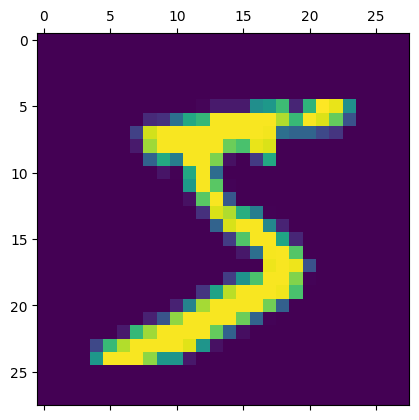

In [18]:
plt.matshow(X_train[0])

In [19]:
X_train[0].shape

(28, 28)

In [23]:
from keras import Sequential, Input, layers

model = Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")  # softmax for 10 classes
])

In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8062 - loss: 0.7265
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.3115
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9236 - loss: 0.2723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.2670


In [26]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9162 - loss: 0.3030


[0.2662672698497772, 0.9265000224113464]

In [27]:
y_predicted=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


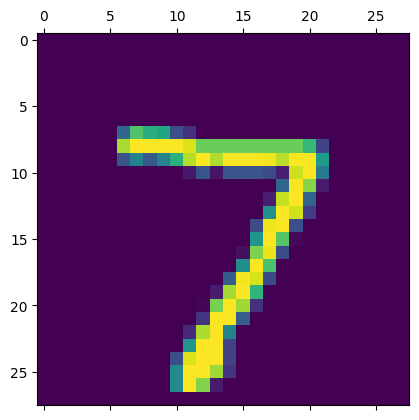

In [28]:
plt.matshow(X_test[0])

In [29]:
y_predicted[0]

array([5.1285338e-06, 7.4720938e-11, 1.6656477e-05, 4.0056184e-03,
       3.4865045e-07, 2.8091608e-05, 3.6589246e-10, 9.9540615e-01,
       2.1207046e-05, 5.1652291e-04], dtype=float32)

In [30]:
np.argmax(y_predicted[0])

np.int64(7)

In [33]:
#Preparing data for the confusion matrix
y_predicted_labels=[np.argmax(i) for i in y_predicted]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    4,    1,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    8,  929,   15,    8,    4,   12,    8,   38,    3],
       [   3,    0,   24,  921,    1,   23,    2,    8,   20,    8],
       [   2,    1,    7,    2,  907,    0,    8,    4,   10,   41],
       [  11,    3,    5,   33,    6,  773,   17,    5,   32,    7],
       [  14,    3,    9,    1,    7,    9,  911,    1,    3,    0],
       [   1,    5,   27,    7,    6,    0,    0,  943,    3,   36],
       [   7,    7,    6,   20,    9,   20,    9,   10,  878,    8],
       [  11,    7,    1,    9,   21,    6,    0,   18,    7,  929]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

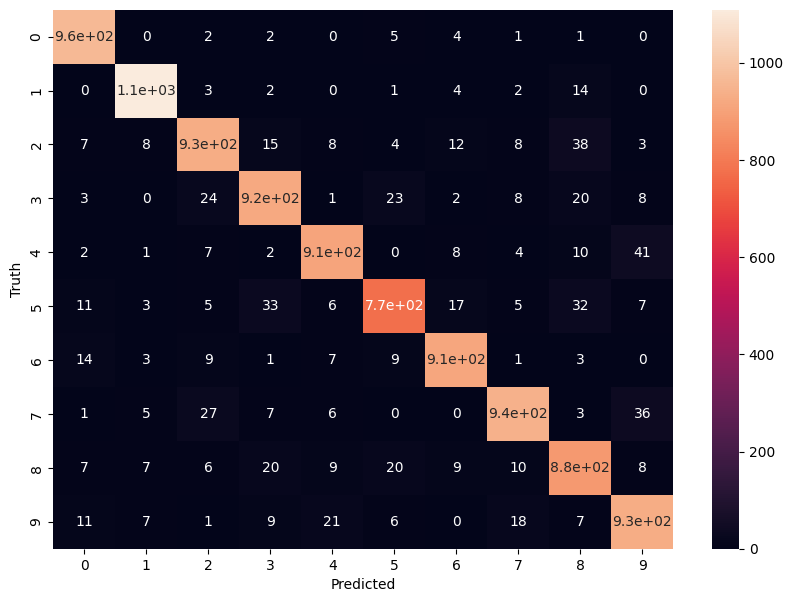

In [34]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
#trying to add another hidden layer to check on the accuracy
from keras import Sequential,layers,Input

model=Sequential([
    Input(shape=(28,28)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9606 - loss: 0.1353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0913
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0671
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0523
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0429


In [38]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9707 - loss: 0.0956


[0.07958126068115234, 0.9749000072479248]